In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility_modified import get_molecular_data, obtain_PES
from tequila import QubitHamiltonian, Variable, quantumchemistry, gates, PauliString, minimize
from timeit import default_timer as timer

basis = 'sto-3g'

## CH<sub>4</sub>

In [6]:
bond_lengths = np.linspace(0.4,3.1,15)

In [7]:
bond_lengths

array([0.4       , 0.59285714, 0.78571429, 0.97857143, 1.17142857,
       1.36428571, 1.55714286, 1.75      , 1.94285714, 2.13571429,
       2.32857143, 2.52142857, 2.71428571, 2.90714286, 3.1       ])

In [19]:
get_molecular_data('ch4', 'geometry')

[['C', [0, 0, 0]],
 ['H', [0, 0, 'geometry']],
 ['H', [1.026719, 0, -0.363]],
 ['H', [-0.51336, -0.889165, -0.363]],
 ['H', [-0.51336, 0.889165, -0.363]]]

In [9]:
#Run FCI
start = timer()
FCI_PES = obtain_PES('ch4', bond_lengths, basis, method='fci')
end = timer()

E = -37.86621751879653 Eh
E = -39.22049331823982 Eh
E = -39.66266067467885 Eh
E = -39.790678485843785 Eh
E = -39.803473395265385 Eh
E = -39.77389138803398 Eh
E = -39.73165941305151 Eh
E = -39.6903697646988 Eh
E = -39.65632240114892 Eh
E = -39.63167623173267 Eh
E = -39.61572929998424 Eh
E = -39.606282106557764 Eh
E = -39.60102250479832 Eh
E = -39.598220539904744 Eh
E = -39.596781219341985 Eh


In [10]:
timefci_ch4 = end - start
timefci_ch4

36.025298199999995

In [11]:
#Run HF
start = timer()
HF_PES = obtain_PES('ch4', bond_lengths, basis,  method='hf')
end = timer()

E = -37.803205884193716 Eh
E = -39.154504203080414 Eh
E = -39.59269663721972 Eh
E = -39.71551577929454 Eh
E = -39.720990909811064 Eh
E = -39.681015459232675 Eh
E = -39.624427970417244 Eh
E = -39.56413697440496 Eh
E = -39.506336691603664 Eh
E = -39.454180578376565 Eh
E = -39.40907015155555 Eh
E = -39.371202355461165 Eh
E = -39.34007258332817 Eh
E = -39.31488987333267 Eh
E = -39.29479501432242 Eh


In [12]:
timehf_ch4 = end - start
timehf_ch4

22.67704931899999

In [14]:
#Run CCSD
start = timer()
CCSD_PES = obtain_PES('ch4', bond_lengths, basis,  method='ccsd')
end = timer()

E = -37.86607830083085 Eh
E = -39.22034993626758 Eh
E = -39.66249783449593 Eh
E = -39.79047775562272 Eh
E = -39.803208352271156 Eh
E = -39.77351589537611 Eh
E = -39.73110184562123 Eh
E = -39.68954077416322 Eh
E = -39.655148863571775 Eh
E = -39.630147145949294 Eh
E = -39.61390566615684 Eh
E = -39.6042587607636 Eh
E = -39.59888955888644 Eh
E = -39.59603628648385 Eh
E = -39.59457798914622 Eh


In [15]:
timeccsd_ch4 = end - start
timeccsd_ch4

25.601187323000005

In [16]:
#Run CISD
start = timer()
CISD_PES = obtain_PES('ch4', bond_lengths, basis,  method='cisd')
end = timer()

E = -37.86470454277618 Eh
E = -39.21881445245562 Eh
E = -39.66071981062167 Eh
E = -39.78833788080658 Eh
E = -39.80049515692875 Eh
E = -39.76988839902356 Eh
E = -39.72605700806382 Eh
E = -39.68241702429142 Eh
E = -39.645223592566786 Eh
E = -39.61686695715621 Eh
E = -39.597122358492186 Eh
E = -39.58425299597415 Eh
E = -39.57618637799907 Eh
E = -39.57121850618874 Eh
E = -39.56817103202858 Eh


In [17]:
timecisd_ch4 = end - start
timecisd_ch4

13.902655589999995

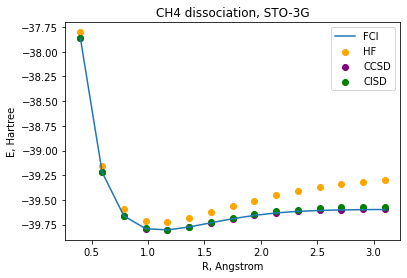

In [18]:
#Plot CH4 PESs

plt.title('CH4 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green')

plt.legend()
plt.savefig('ch4_dissociation')